# 👁️ Lo and behold!

In [ ]:
#| default_exp lo

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export

from typing import Any, Union, Optional as O
from matplotlib import pyplot as plt, axes, figure


import numpy as np
from fastcore.all import store_attr

from lovely_numpy.utils import history_warning
from lovely_numpy.repr_str import lovely
from lovely_numpy.repr_plt import PlotProxy
from lovely_numpy.repr_rgb import RGBProxy
from lovely_numpy.repr_chans import ChanProxy

In [ ]:
#| export

class Lo():
    """Lo and behold! What a lovely `numpy.ndarray`!"""
    def __init__(   self,
                    x: Union[np.ndarray, np.generic], # Your data
                    plain       =False, # Show as plain text - values only
                    verbose     =False, # Verbose - show values too
                    depth       =0,     # Expand up to `depth`
                    color :O[bool] =None): # Use ANSI colors
        self.x      =x
        self.plain  =plain
        self.verbose=verbose
        self.depth  =depth
        self.color  =color


        history_warning()

    def __repr__(self):
        return lovely(self.x, plain=self.plain, verbose=self.verbose,
                      depth=self.depth, color=self.color)

    @property
    def v(self):
        "Verbose"
        return Lo(self.x, verbose=True, color=self.color)

    @property
    def p(self):
        "Good old plain representation"
        return Lo(self.x, plain=True, color=self.color)

    @property
    def deeper(self):
        "Going deeper"
        return Lo(self.x, verbose=False, plain=False, depth=1, color=self.color)

    @property
    def rgb(self):
        "Show an image"
        return RGBProxy(self.x)

    @property
    def chans(self):
        "Show color channels"
        return ChanProxy(self.x)

    @property
    def plt(self):
        return PlotProxy(self.x)

    # This is used for .deeper attribute and .deeper(depth=...).
    # The second one results in a __call__.
    def __call__(self, depth=1):
        return Lo(self.x, depth=depth, color=self.color)

In [ ]:
# |export

def lo(x: Union[np.ndarray, np.generic],    # Your data
        plain   :bool   =False, # Show as plain text - values only
        verbose :bool   =False, # Verbose - show values too
        depth   :int    =0,     # Expand up to `depth`
        color   :O[bool]=None): # Use ANSI colors
    return Lo(x, plain=plain, verbose=verbose, depth=depth, color=color)

### Examples

In [ ]:
t = np.array([[1,2,3], [4,5,6]])
t

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
lo(t).v # Verbose

array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
lo(t).p # Plain

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
lo(t).deeper

array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
  array[3] i64 x∈[1, 3] μ=2.000 σ=0.816 [1, 2, 3]
  array[3] i64 x∈[4, 6] μ=5.000 σ=0.816 [4, 5, 6]

In [ ]:
lo(t[None]).deeper(2) # We need to go deeper

array[1, 2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[[1, 2, 3], [4, 5, 6]]]
  array[2, 3] i64 n=6 x∈[1, 6] μ=3.500 σ=1.708 [[1, 2, 3], [4, 5, 6]]
    array[3] i64 x∈[1, 3] μ=2.000 σ=0.816 [1, 2, 3]
    array[3] i64 x∈[4, 6] μ=5.000 σ=0.816 [4, 5, 6]

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
image = np.load("mysteryman.npy").transpose(1,2,0)
lo(image)

array[196, 196, 3] f32 n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

In [ ]:
spicy = image.flatten()[:12].copy()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
lo(spicy)

array[2, 6] f32 n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN!

In [ ]:
# image = np.zeros((196,196,3))
# image[:75,::2,:] = 1
# image[75::2,:,:] = 1

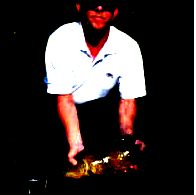

In [ ]:
lo(image).rgb #.fig.savefig("output.png", metadata={"Software": None})

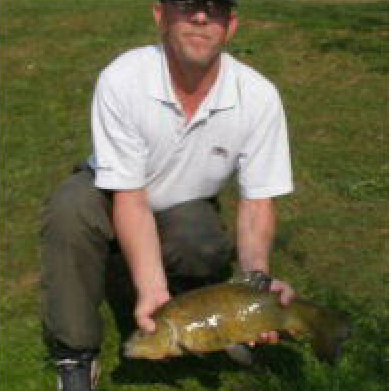

In [ ]:
lo(image).rgb(scale=2, denorm=in_stats)

In [ ]:
lo(image*0.3+0.5)

array[196, 196, 3] f32 n=115248 x∈[-0.135, 1.292] μ=0.384 σ=0.322

In [ ]:
# |hide
import matplotlib

In [ ]:
# |hide
np.random.seed(1)
matplotlib.rcParams["svg.hashsalt"] = "1"
%config InlineBackend.print_figure_kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }}

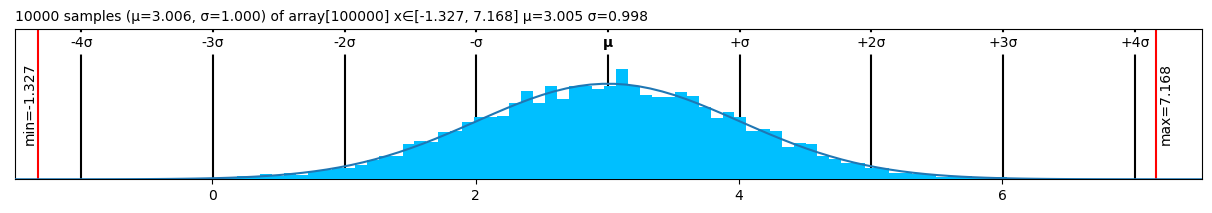

In [ ]:
x = np.random.randn(100000)+3
lo(x).plt(center="mean")

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()